# 사전 세팅

- 오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!

- [원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

# 미션 시작

## 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

**🔽 출력 예시**

![](https://cphinf.pstatic.net/mooc/20221101_237/1667299866524ACbfi_PNG/mceclip0.png)

### 데이터 분석 접근 계획

1. 전체 데이터 셋 확인, 데이터 컬럼 확인
2. 데이터 결측치 체크
3. 컬럼명 & 단위 변경, 데이터 타입 변경
4. "백만, 연도, 분기" 로 구성해서 연도와 분기별 해외 판매량 추이 체크


In [ ]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [ ]:
# 전체 데이터 형태 체크
print("================== df.shape ==================\n", df.shape)
print("================== df.describe ==================\n", df.describe())
print("================== df.columns ==================\n", df.columns)
df.describe(include="object")

================== df.shape ==================
 (2772, 5)
================== df.describe ==================
                 데이터
count   2772.000000
mean    1613.116522
std     4273.426107
min   -10003.000000
25%       41.750000
50%      291.500000
75%     1181.000000
max    47689.000000
================== df.columns ==================
 Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')


,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [ ]:
# 세부 컬럼 값, 결측치 체크
for col in df.columns:
    print(f"================== {col} 의 세부 체크 ==================")
    print(df[col].value_counts())
    print("df[col].isnull().sum() >> ", df[col].isnull().sum())


================== 국가(대륙)별 의 세부 체크 ==================
국가(대륙)별
미국            308
중국            308
일본            308
아세안(ASEAN)    308
유럽연합(EU)      308
중동            308
중남미           308
대양주           308
기타            308
Name: count, dtype: int64
df[col].isnull().sum() >>  0
================== 상품군별 의 세부 체크 ==================
상품군별
컴퓨터 및 주변기기      198
가전·전자·통신기기      198
소프트웨어           198
서 적             198
사무·문구           198
음반·비디오·악기       198
의류 및 패션 관련상품    198
스포츠·레저용품        198
화장품             198
아동·유아용품         198
음·식료품           198
농축수산물           198
생활용품 및 자동차용품    198
기 타             198
Name: count, dtype: int64
df[col].isnull().sum() >>  0
================== 판매유형별 의 세부 체크 ==================
판매유형별
면세점 이외    2772
Name: count, dtype: int64
df[col].isnull().sum() >>  0
================== 시점 의 세부 체크 ==================
시점
2017.1/4       126
2017.2/4       126
2022.1/4       126
2021.4/4       126
2021.3/4       126
2021.2/4       126
2021.1/4       126
2020.4/4       12

In [ ]:
# df object 깊은 복사, 원본 보관
df_q1 = df.copy()

# 연도 컬럼 생성
df_q1["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df_q1

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [ ]:
# 분기 컬럼 생성
df_q1["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df_q1

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [ ]:
# 백만 컬럼 생성
# 결측치 없는 것으로 판단되지만, 강의에서 학습한 것을 활용
df_q1["백만"] = df["데이터"].replace("-", np.nan).astype(float)

# 하지만 위와 같이 신규 컬럼 생성 & casting 대신 아래와 같이 rename 사용해도 될 듯
# df.rename(columns={"데이터":"백만"}, inplace=True)
df_q1

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1,1054.0
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2,946.0
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3,791.0
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4,854.0
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1,2033.0
...,...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2,1278.0
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3,1154.0
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4,1076.0
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1,2325.0


In [ ]:
# 사용할 컬럼만 선별!, 다시 target_df 구성
target_df = df_q1[["백만", "연도", "분기"]]
target_df.describe()

# 17년 부터 22년 2분기 까지, 평균 매출 1,613,000,000 - 16억 정도 임을 알 수 있음
# 그러나 중위값(50%) 값이 291,500,000 로 보아 상위 매출에서 평균을 매우 견인하고 있음
# 분명 결측치(null & nan)는 없어 보이나 금액 단위의 최소 값이 이상함, 판단 필요

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


In [ ]:
# 금액 단위 컬럼에서 이상값 체크
target_df[target_df["백만"] < 0]

,백만,연도,분기
1102,-10003.0,2017,3


In [ ]:
# 원본에서도 다시 체크
df_q1[df_q1["데이터"] < 0]

# 아세안의 17년도 3분기 화장품 해외 판매량 급격히 감소

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만
1102,아세안(ASEAN),화장품,면세점 이외,2017.3/4,-10003,2017,3,-10003.0


<Axes: xlabel='연도', ylabel='백만'>

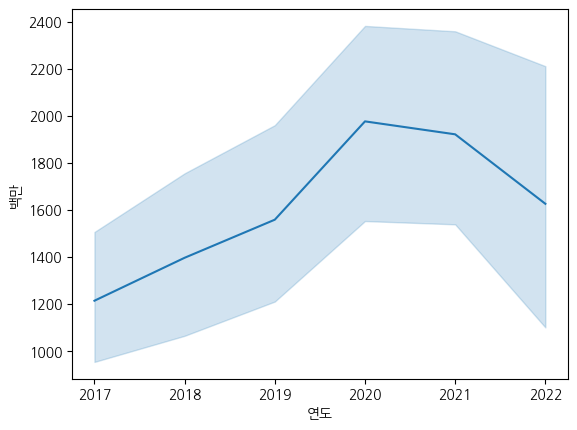

In [ ]:
# 전체적으로 연도와 분기별 해외 판매량 추이 체크를 위해 시각화 접근
sns.lineplot(data=target_df, x="연도", y="백만")

### 데이터 분석 결론

1. 17년 부터 22년 2분기 까지, 평균 매출 1,613,000,000(16억) 정도 임을 알 수 있음
2. 그러나 중위값(50%) 값이 291,500,000 로 보아 상위 매출에서 평균을 매우 견인하고 있음
3. 아세안의 17년도 3분기 화장품 해외 판매량 급격히 감소, https://www.cosmeticsdesign-asia.com/Article/2019/10/30/Decoding-cosmetic-regulation-differences-within-the-ASEAN-region 규제 관련 원인으로 파악됨
4. 하지만 20년도 이후 전체적으로 우하향이 되어버렸는데, covid 19 영향이 있을 것으로 판단됨

## 📌Q2.pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

**🔽 출력 예시**

![](https://cphinf.pstatic.net/mooc/20221101_50/1667300342767ri3nl_PNG/mceclip1.png)

### 데이터 분석 접근 계획

1. [ 국가(대륙)별 & 연도별 ] group 해서 df 구성하기
2. group by 기준 값은 "백만" (원본에서는 데이터) 값의 sum 으로 하기
3. 그리고 국가별로 연도별 성장치가 어떻게 변화 했는지 확인하기

In [ ]:
# q1 에서 구성한 원본 데이터 기반 q2 데이터 프레임 구성
# index 를 국가로, col 을 연도로 잡아 피봇테이블 구성
df_q2 = df_q1.pivot_table(values='백만', index='국가(대륙)별', columns='연도', aggfunc='sum')
df_q2

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),66163.0,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0
일본,125442.0,178094.0,189330.0,220730.0,280029.0,131771.0
중국,167240.0,182068.0,210418.0,289446.0,194380.0,98572.0
중남미,10245.0,11669.0,12981.0,12563.0,8298.0,2629.0
중동,8030.0,8019.0,9325.0,11467.0,6164.0,1389.0


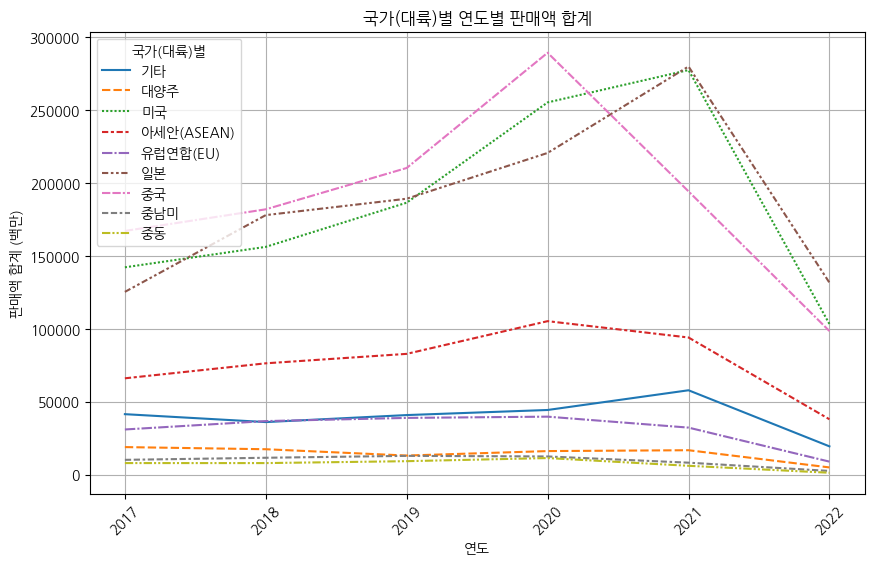

In [ ]:
# lineplot 데이터 시각화
# x & y 축 바꾸기
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_q2.T)  # T는 행과 열을 전환 (연도가 x축으로 오게 함)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.ylabel('판매액 합계 (백만)')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.legend(title='국가(대륙)별', loc='upper left')
plt.grid(True)


Text(95.72222222222221, 0.5, '국가(대륙)별')

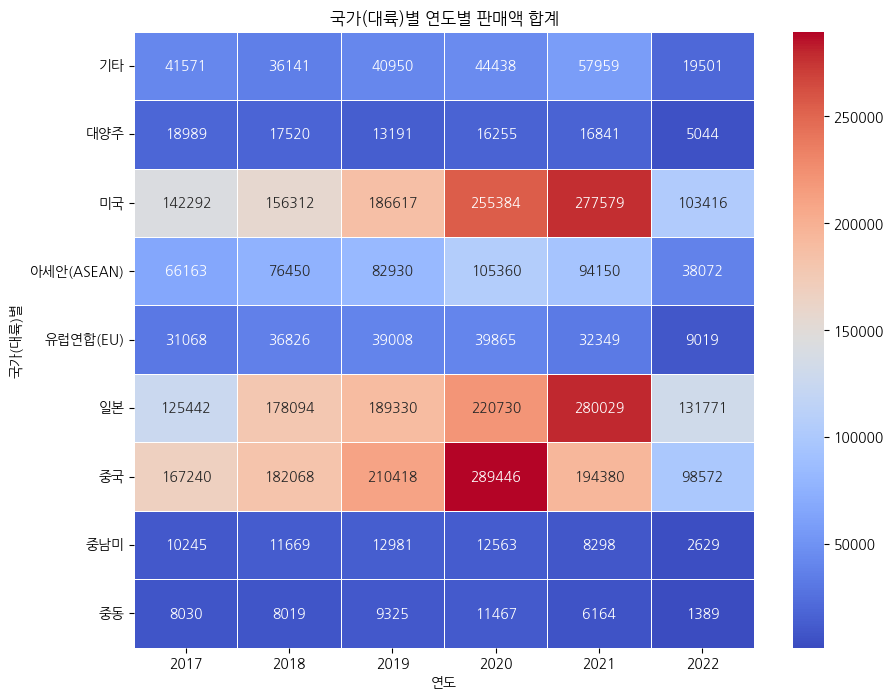

In [ ]:
# 히트맵으로 시각화 해보기
# 연도와 국가(대륙)별 판매액을 색상의 강도로
plt.figure(figsize=(10, 8))
sns.heatmap(df_q2, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.xlabel('연도')
plt.ylabel('국가(대륙)별')

# 히트맵으로 연도별 순위 한 번에 볼 수 있음
# 20년도 중국이 가장 hot, 다음 미국
# 21년도 일본이 가장 hot, 다음 미국, 중국이 급격하게 감소한 것을 알 수 있음

### 데이터 분석 결론

1. 대륙별 전체적인 온라인 판매량이 생각보다 다양하게 변함
2. 인근 나라 (일본, 중국) 와 동맹국 (미국) 에 대한 판매량 추이도 연도별로 다양하게 변함
3. 20년도 중국이 가장 hot, 다음 미국
4. 21년도 일본이 가장 hot, 다음 미국, 중국이 급격하게 감소한 것을 알 수 있음
5. 감소 원인에 대해서는 bias 일 수 있으나 (covid19 제외하면) 한국 문화, 한류에 대한 전파 영향성에 대한 가설을 생각 할 수 있음, 이를 위해서는 세부 자료 조사 필요

## 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

- `2020년`은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

### 데이터 분석 접근 계획

1. q1에서 만든 df 기반 2020 년도만 가져와서 df 확인
2. 코로나 시기에 대한 연도 groupby & unstacsk 활용
3. 어떤 "해외 지역" 에 "온라인 판매량" 이 변화 되었는지 시각화 해보기

In [ ]:
df_q3 = df_q1[df_q1['연도'] == 2020]
df_q3 = df_q3.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
df_q3

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716.0,3345.0,9.0,187.0,1464.0,4563.0,21.0,755.0,1646.0,1596.0,1410.0,6501.0,5653.0,15572.0
대양주,3825.0,923.0,1.0,21.0,1198.0,367.0,20.0,690.0,484.0,403.0,1800.0,3746.0,318.0,2459.0
미국,10103.0,38731.0,33.0,398.0,11467.0,9709.0,865.0,5862.0,4934.0,2706.0,32919.0,82154.0,6057.0,49446.0
아세안(ASEAN),12405.0,2620.0,17.0,3279.0,6432.0,4192.0,3.0,7423.0,2698.0,4291.0,16135.0,37992.0,541.0,7332.0
유럽연합(EU),3040.0,3907.0,0.0,25.0,2560.0,514.0,99.0,1297.0,1354.0,423.0,12092.0,5120.0,1910.0,7524.0
일본,404.0,30509.0,2.0,1526.0,3911.0,1055.0,27.0,646.0,1353.0,4699.0,14738.0,119452.0,193.0,42215.0
중국,1353.0,22736.0,88.0,403.0,7142.0,6659.0,4.0,3999.0,5606.0,4220.0,125078.0,73068.0,235.0,38855.0
중남미,912.0,625.0,0.0,3.0,1361.0,188.0,15.0,183.0,151.0,774.0,6421.0,614.0,362.0,954.0
중동,839.0,533.0,0.0,4.0,1060.0,139.0,17.0,196.0,121.0,927.0,3250.0,1776.0,388.0,2217.0


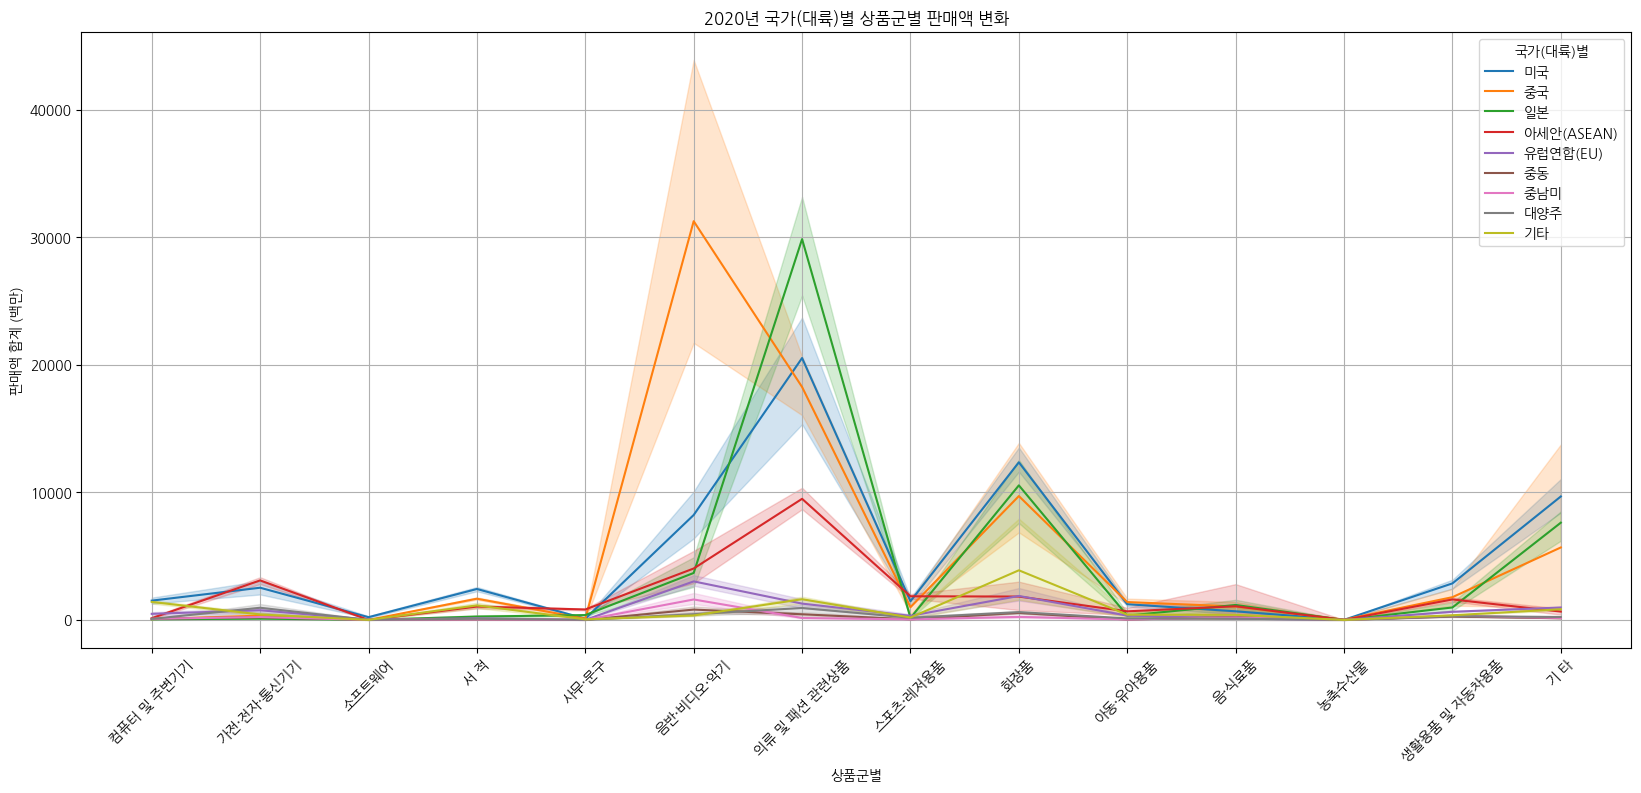

In [ ]:
# 상품군 별 판매액을 국가별로 다른 색으로 line chart 활용해보기
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=df_q1[df_q1['연도'] == 2020], x="상품군별", y="백만", hue="국가(대륙)별")

plt.title('2020년 국가(대륙)별 상품군별 판매액 변화')
plt.xlabel('상품군별')
plt.ylabel('판매액 합계 (백만)')
plt.legend(title='국가(대륙)별')
plt.xticks(rotation=45)
plt.grid(True)

# 생각보다 데이터가 많아서 한 눈에 알아보기 힘듦

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '가전·전자·통신기기'),
  Text(1, 0, '기 타'),
  Text(2, 0, '농축수산물'),
  Text(3, 0, '사무·문구'),
  Text(4, 0, '생활용품 및 자동차용품'),
  Text(5, 0, '서 적'),
  Text(6, 0, '소프트웨어'),
  Text(7, 0, '스포츠·레저용품'),
  Text(8, 0, '아동·유아용품'),
  Text(9, 0, '음·식료품'),
  Text(10, 0, '음반·비디오·악기'),
  Text(11, 0, '의류 및 패션 관련상품'),
  Text(12, 0, '컴퓨터 및 주변기기'),
  Text(13, 0, '화장품')])

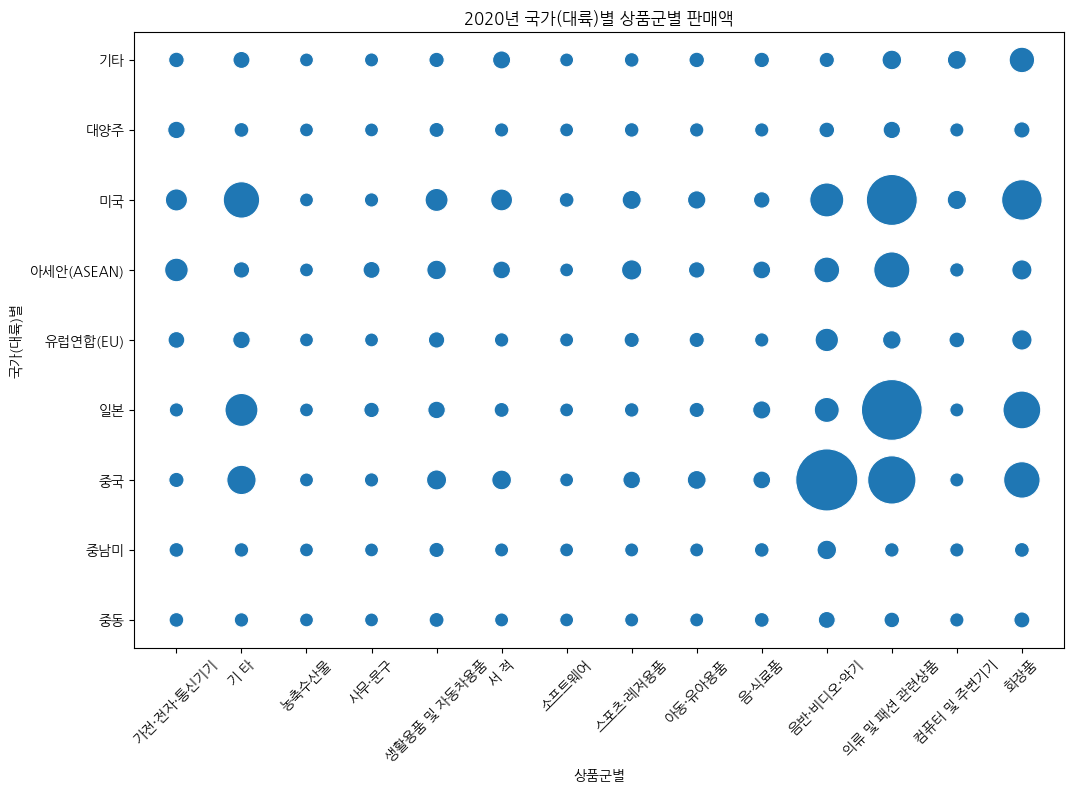

In [ ]:
# 우선 단순히 상품군별 판매액이 국가별로 얼마나 볼륨 차이가 나는지
# scatterplot 활용해서 넓이로 먼저 확인하기

# 데이터 플랫닝
flat_data = df_q3.reset_index().melt(id_vars=['국가(대륙)별'], value_name='판매액', var_name='상품군별')

# 버블 차트
plt.figure(figsize=(12, 8))
bubble = sns.scatterplot(data=flat_data, x='상품군별', y='국가(대륙)별', size='판매액', legend=False, sizes=(100, 2000))
bubble.set_title('2020년 국가(대륙)별 상품군별 판매액')
plt.xticks(rotation=45)

# [음반, 비디오, 악기] & [의류 및 패션 관련 상품] & [화장품]
# 위 3개의 품목 군집이 가장 눈에 띄며 [중국, 일본, 미국] 이 가장 영향이 큰 국가로 판단됨

Text(0, 0.5, '상품군별')

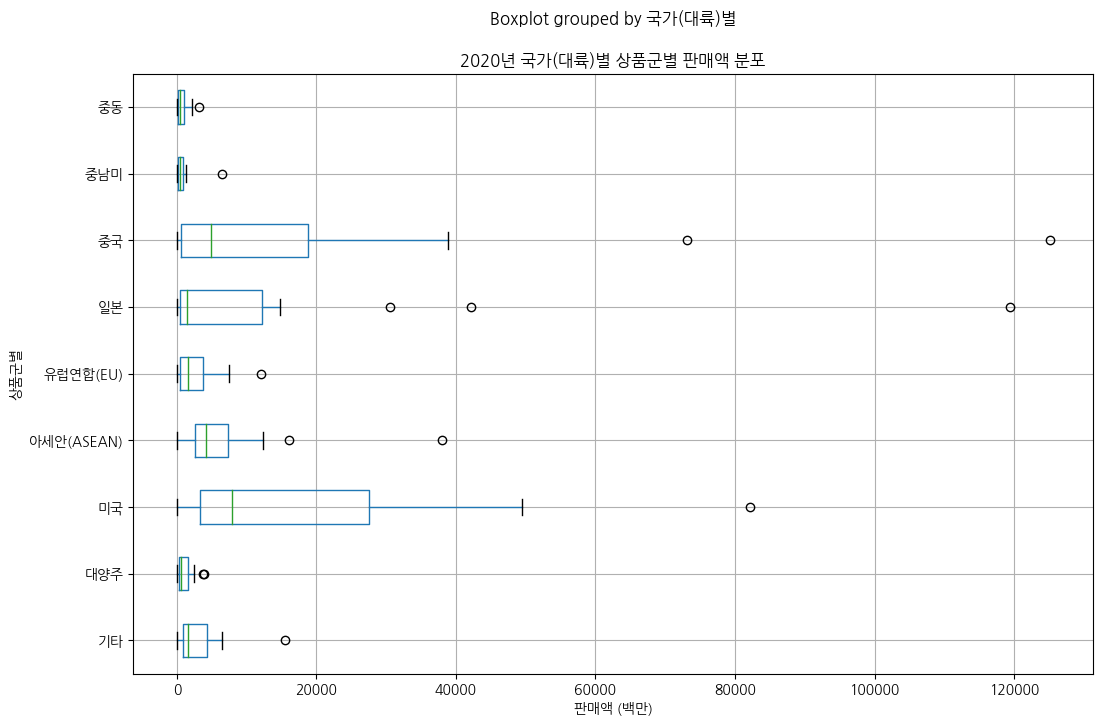

In [ ]:
# 위에서 활용한 Flat 된 데이터 기반으로
# box plot 활용, 중앙값, 사분위수, 이상치 체크
flat_data.boxplot(by='국가(대륙)별', column='판매액', figsize=(12, 8), vert=False)
plt.title('2020년 국가(대륙)별 상품군별 판매액 분포')
plt.xlabel('판매액 (백만)')
plt.ylabel('상품군별')


### 데이터 분석 결론

1. `[음반, 비디오, 악기]` & `[의류 및 패션 관련 상품]` & `[화장품]` 3개의 품목이 가장 수출량이 큼
2. 해당 상품군에 가장 큰 영향을 주는 국가는 `[중국, 일본, 미국]` 임
3. box plot 세부 분석
  1. ***중국*** 의 중앙값이 높은편, 대부분의 상품군이 평균적으로 높은 판매가 이뤄졌음
  2. box 의 넓이와 box를 벗어나는 값으로 보아 데이터의 분산이 꽤 큰 것으로 보임, 상품군별 판매액 차이가 꽤 있는 것
  3. ***일본*** 은 중국보다 박스는 좁고, 상대적으로 분선이 적음, 하지만 이상치는 존재
  4. ***미국*** 이 중국과 꽤 유사한 결과 값을 보여줌, 근데 중국보다 더 분산되어 있으며 확실한 이상치가 있는 것으로 보임

## 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

**🔽 출력 예시**

![](https://cphinf.pstatic.net/mooc/20221108_148/16678975785839ha9y_PNG/mceclip0.png)

### 데이터 분석 접근 계획
1. 판매액 높은 지역과 상품군으로 df 구성하기 (q1 df 활용)
2. line plot 으로 먼저 시각화 접근
3. 연도별, 국가별로 어떻게 변화 했는지 시각화 하기!

In [ ]:
# 2021년까지의 데이터 필터링, df_q1 활용
df_q4 = df_q1[(df_q1['연도'] <= 2021) &
                 (df_q1['국가(대륙)별'].isin(['미국', '중국', '일본'])) &
                 (df_q1['상품군별'].isin(['의류 및 패션 관련상품', '화장품', '음반·비디오·악기']))]
df_q4

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기,백만
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1,1922.0
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2,1778.0
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3,2281.0
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4,2647.0
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1,2362.0
...,...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4,11994.0
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1,12421.0
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2,18768.0
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3,23380.0


In [ ]:
# 그룹화 및 합계 계산
grouped = df_q4.groupby(['연도', '국가(대륙)별', '상품군별'])['백만'].sum().reset_index()
grouped

,연도,국가(대륙)별,상품군별,백만
0,2017,미국,음반·비디오·악기,8628.0
1,2017,미국,의류 및 패션 관련상품,49891.0
2,2017,미국,화장품,31237.0
3,2017,일본,음반·비디오·악기,2824.0
4,2017,일본,의류 및 패션 관련상품,89085.0
5,2017,일본,화장품,6333.0
6,2017,중국,음반·비디오·악기,8437.0
7,2017,중국,의류 및 패션 관련상품,84248.0
8,2017,중국,화장품,34608.0
9,2018,미국,음반·비디오·악기,13858.0


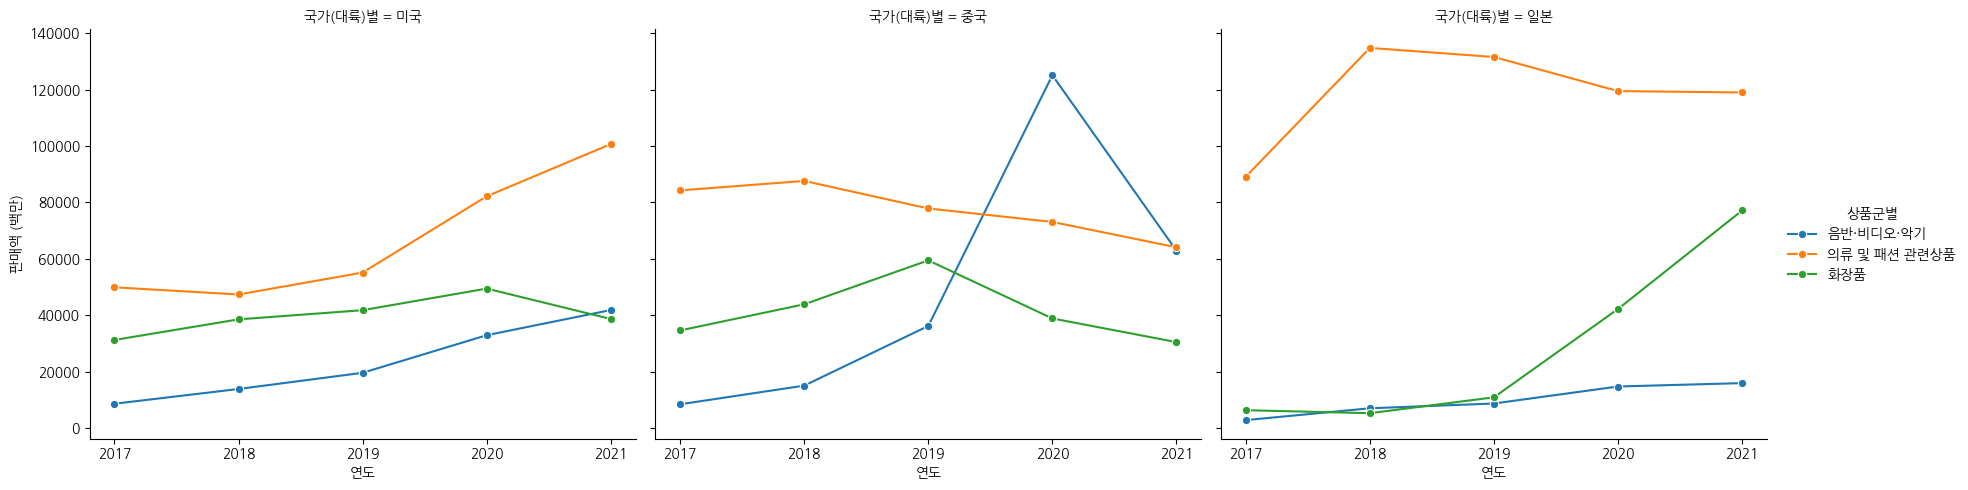

In [ ]:

# 세 개의 국가별 line plot 본격적으로 시각화
# 시각화 - FacetGrid를 사용하여 국가(대륙)별로!
g = sns.FacetGrid(grouped, col="국가(대륙)별", hue="상품군별", col_order=['미국', '중국', '일본'], col_wrap=3, height=5, aspect=1.2)
g.map(sns.lineplot, "연도", "백만", marker="o")

# 레전드 추가
g.add_legend(title="상품군별")

# 그래프 타이틀 및 라벨 추가
g.set_axis_labels("연도", "판매액 (백만)")
g.set_titles(col_template="국가(대륙)별 = {col_name}")

# 소수점 및 값 정수 포멧으로 casting, 모든 축에 대해 적용
import matplotlib.ticker as mticker
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())  # 정수 포맷 적용
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # 정수 단위로 표시

# 미국은 전체적으로 우상향, 화장품만 하향
# 중국은 [ 음반 비디오 악기 ] 의 극심한 변동폭
# 일본은 의류 및 패션 관련 상품을 철저하게 견인하고 있음을 알 수 있음

<ipython-input-137-c24eb979990c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='연도', y='백만', hue='상품군별', ci=None, palette='viridis', dodge=True)


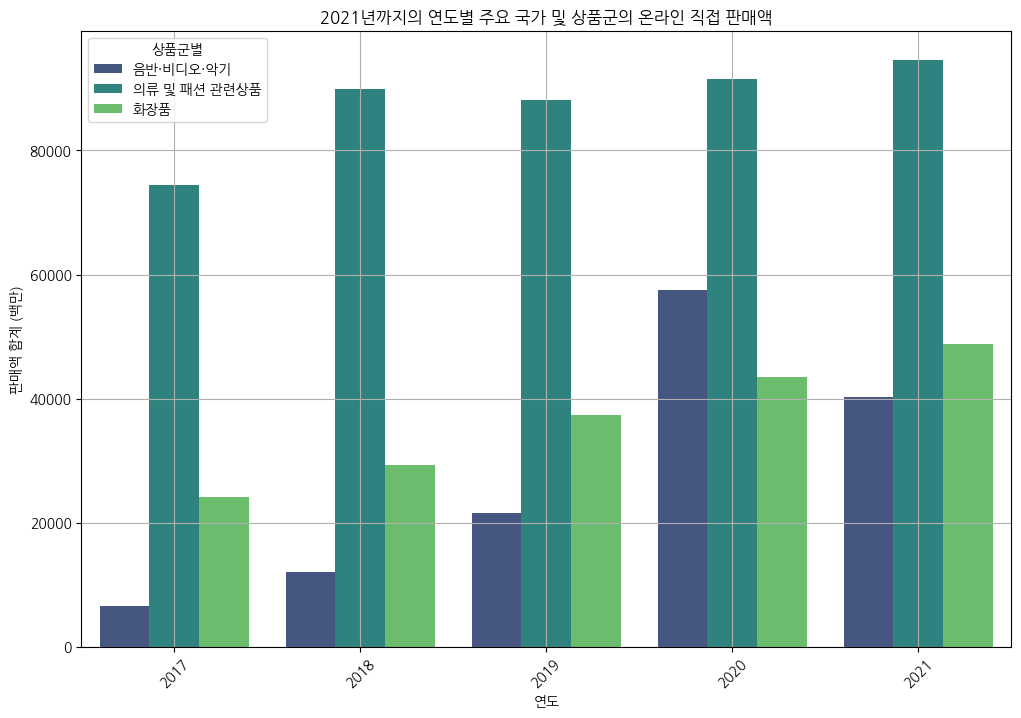

In [ ]:
# 그러면 항목끼리 bar 로 붙여서 항목끼리는 얼마나 차이가 날까

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='연도', y='백만', hue='상품군별', ci=None, palette='viridis', dodge=True)
plt.title('2021년까지의 연도별 주요 국가 및 상품군의 온라인 직접 판매액')
plt.xlabel('연도')
plt.ylabel('판매액 합계 (백만)')
plt.legend(title='상품군별')
plt.xticks(rotation=45)
plt.grid(True)

# q3 에서 분석 및 접근한 결과와 같은 인사이트를 얻을 수 있음
# 하지만 세가지 핵심 종류 중 "가장 큰 판매량 영향을 준 상품은 의류 및 패션 관련 상품 인 것을 확실하게 알 수 있음"

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


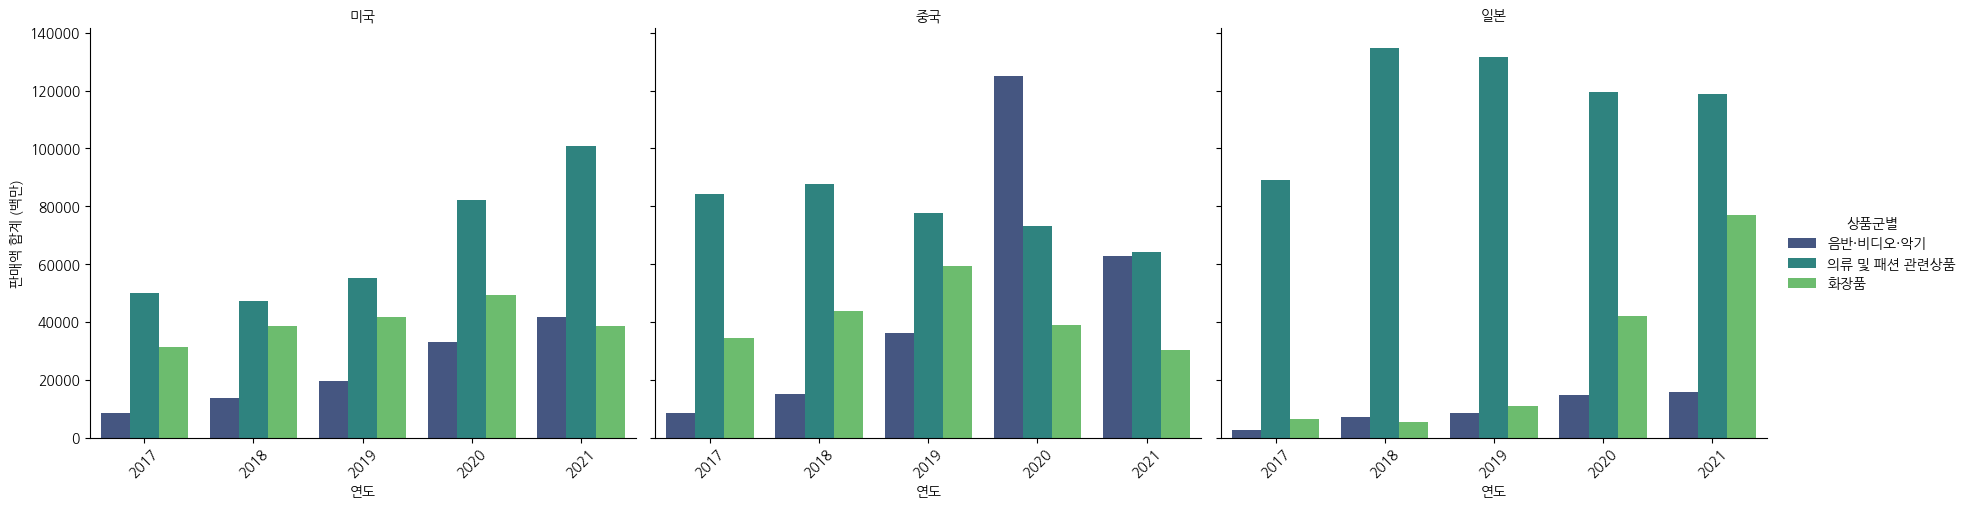

In [ ]:
# 위 2가지 시각화를 섞고 활용해서
# 국가별 barchat, FacetGrid 사용해보기
g = sns.FacetGrid(grouped, col="국가(대륙)별", col_order=['미국', '중국', '일본'], height=5, aspect=1.2)
g.map(sns.barplot, "연도", "백만", "상품군별", ci=None, palette='viridis', dodge=True)

# 레전드 추가
g.add_legend(title="상품군별")

# 그래프 타이틀 및 라벨 추가
g.set_axis_labels("연도", "판매액 합계 (백만)")
g.set_titles(col_template="{col_name}")

# X축 레이블 회전
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

### 데이터 분석 결론
1. `[음반, 비디오, 악기]` & `[의류 및 패션 관련 상품]` & `[화장품]` 품목에서 `[중국, 일본, 미국]` 의 국가들이 기여하는 정도가 다 다름
2. 세 품목중 3개의 국가 모두에게서 `[의류 및 패션 관련 상품]` 양 자체가 많았음, 여기서 주의할 점은 해당 품목은 high end - low end 바운더리가 매우 넓은 품목, 뿐만 아니라 종류가 굉장함
3. 중국의 20년도에 굉장히 큰 폭믜 "음반 비디오 악기" 성장이 있었음, 많은 bias & 할루시네이션을 동반할 수 있으나 LLM 활용해 아래와 같은 원인을 찾음
  ```
  2020년에 중국에서 음반, 비디오, 악기 품목의 판매가 급격히 증가한 주요 원인은 COVID-19 팬데믹의 영향과 관련이 깊습니다. 팬데믹으로 인해 사람들이 집에서 보내는 시간이 증가하면서, 음악과 악기 관련 소비가 급격히 늘어났습니다. 특히, 사회적 거리두기로 인해 집에서 즐길 수 있는 취미 활동이 중요해졌고, 이는 악기 연주나 음악 관련 제품의 수요를 촉진했습니다.

  중국 내에서 피아노와 같은 악기 학습이 점점 더 인기를 끌고 있으며, 2020년에는 피아노 교육 시장이 약 150억 달러를 초과한 것으로 추정됩니다. 또한, 중국의 음악 교육 시장이 성장하면서 악기 판매가 증가한 것으로 보입니다. 이와 함께, 라이브 스트리밍과 같은 새로운 음악 소비 방식의 확산도 이러한 증가에 기여했습니다.

  또한, 중국은 전통적으로 악기 제조와 수출에서 중요한 역할을 하고 있어, 이와 같은 성장세가 더 두드러졌습니다. 2020년 하반기에는 악기와 관련된 수입액이 40% 가까이 증가했으며, 이는 팬데믹으로 인한 음악 및 악기 수요 증가와 관련이 있습니다​
  
  - https://music-china.hk.messefrankfurt.com/shanghai/en/press/press-releases/2021/MUC21_PR1.html
  - https://www.6wresearch.com/industry-report/china-musical-instruments-market-2020-2026

  이러한 요인들이 결합되어 2020년 중국에서 음반, 비디오, 악기 품목의 판매량이 급격하게 증가한 것으로 분석됩니다.
  ```
4. 세 품목 중 가장 steady seller 인 품목은 `[의류 및 패션 관련 상품]` 임 (가장 등락폭이 좁은 것으로 판단됨)
5. 앞 서 분석한 바와 같이 일본의 21년도 화장품 판매량 급증이 보임

# 자유 미션 시작

## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

> 미세먼지(PM10) 월별 도시별 대기 오염도 & (날씨) 종관기상, 지점별 연-월 통계 & 질병관리청-만성질환건강통계 데이터 활용하기 <br />
> 우선 관심도와 접근성 높은 데이터를 선별, 이에 부합하는 가설을 아래와 같이 2가지 선정

1. 가설) 대기 오염이 높은 지역에서는 호흡기 질환 발생률이 높을 것이다.


### 가설검정1) 대기 오염이 높은 지역에서는 호흡기 질환 발생률이 높을 것이다.

- PM-10 은 입자의 크기가 10μm 미만인 먼지를 의미함
1. 미세먼지 월별, 도시별 대기 오염도, 질병관리청-만성질환건강통계 에서 호흡기 질환 데이터 프레임 구성하기
  - 전자는 https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_03_0200076&vw_cd=MT_ZTITLE&list_id=T_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE 에서 가져옴
  - 후자는 https://chs.kdca.go.kr/cdhs/biz/pblcVis/details.do?ctgrSn=40 에서 xlsx 로 연도별 추출
  - 두 개의 겹치는 연도 range 는 19년도 부터 21년도
2. 데이터 전처리: 미세먼지 데이터와 건강 데이터를 정리하고 필요한 부분을 추출합니다. 결측치를 제거하는 행위를 포함!
3. 평균 대기 오염 수준 계산: 도시별로 월별 미세먼지 수치를 평균 내어 지역별 연간 평균 오염도를 체크
  - 이미 장소별 / 년&월 별 평균치 세팅되어 있는 데이터임
  - 시각화를 통해 전체적으로 오염도가 어떻게 변화 했는지 체크해보기
4. 건강 데이터와 결합: 대기 오염 데이터와 천식 유병률 데이터를 지역별로 연결합니다.
5. 상관분석: 대기 오염도와 천식 유병률 간의 상관관계를 분석하여 가설을 검정합니다.

In [ ]:
# drive 마운트 필수, 굳이 CDN 활용 안함
# 미세먼지 데이터 19년도 1월 부터 23년도 12월 까지
df_미세먼지 = pd.read_csv("./drive/MyDrive/05. 데이터 분석/106_DT_106N_03_0200076_20240824191254.csv", encoding="cp949")
df_미세먼지

,구분,항목,단위,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,...,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,Unnamed: 63
0,중구,월평균,NaN,60,53,62,35,44,23,26,...,56,33,23,22,18,16,23,26,32,NaN
1,종로구,월평균,NaN,60,51,61,35,44,24,25,...,61,37,26,25,20,19,27,30,37,NaN
2,중랑구,월평균,NaN,58,51,60,32,42,22,22,...,59,37,28,28,22,22,26,27,30,NaN
3,동대문구,월평균,NaN,61,54,63,33,42,22,22,...,64,41,30,30,23,23,30,32,37,NaN
4,은평구,월평균,NaN,64,57,70,44,57,31,26*,...,65,38,28,28*,20,17,26,29,34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,삼진로,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56,31,20,18,17,18,23,23,28,NaN
669,반송로,월평균,NaN,45,57,55,46,53,39,NaN,...,49,30,22,24,21,19,23,25,29,NaN
670,김해대로,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60,38,25,26,24,22,26,26,31,NaN
671,시도평균,월평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,33,23,23,21,20,24,25,29,NaN


In [ ]:
# 항목이랑 단위는 쓸모 없는 컬럼, 제거
use_col = list(df_미세먼지.columns[0:1]) + list(df_미세먼지.columns[3:])
df_미세먼지 = df_미세먼지[use_col]

# '구분' 열을 인덱스로 설정
# df_미세먼지.set_index('구분', inplace=True)

df_미세먼지.sample(10)
# 년도, 월별 장소마다 평균 미세먼지 값으로 세팅 되어 있음
# 생각보다 결측치가 너무 많음, NaN 값을 어떻게 처리하면 좋을지,, 흠
# 일단 결측치가 없는 장소 값을 선정하는게 중요할 듯

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,Unnamed: 63
429,대불,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60,28,23,25,28,39,48,45,57,NaN
92,효성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65,39,29,26,21,21,30,32,37,NaN
424,신대,47,46,46,37,44,32,21,30,20,...,58,35,21,21,18,16,19,18,23,NaN
623,평리동,53,54,56,41,50,36,30,31,27,...,67,36,25,24,18,22,33,38,45,NaN
286,화천군,NaN,46,56,35,40,25,23,24,19,...,53,35,23,24,16,18,23,28,35,NaN
76,운서,50,46,54,33,41,24,27,29,25,...,66,34*,29,29,24,23,30,33,37,NaN
7,동작구,64,59,68,39,48,29,30,30,29,...,59,37,27,26,22,22,27,30,37,NaN
246,금촌동,76,60,73,46,61,31,30,30,29,...,NaN,NaN,NaN,NaN,NaN,26,34,35,41,NaN
335,둔포면,82,61*,75,58,68,43,34,33,33,...,78,46,35,32,29,32,43,38,45,NaN
339,연무읍사무소,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66,33,22,19,20,19,28,27,36,NaN


In [ ]:
# '*' 또는 '**'가 포함된 값들을 제거하고, 숫자로 변환
# 정규식에서 '*'를 처리하기 위해 '\\*'를 사용
df_미세먼지 = df_미세먼지.replace({'\\*': '', '\\*\\*': ''}, regex=True)

# 숫자로 변환
df_미세먼지.iloc[:, 1:] = df_미세먼지.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_미세먼지

# Unnamed: 63 라는 이상한 컬럼 있음,,

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,Unnamed: 63
0,중구,60.0,53.0,62.0,35.0,44.0,23.0,26.0,24.0,20.0,...,56.0,33.0,23.0,22.0,18.0,16.0,23.0,26.0,32.0,NaN
1,종로구,60.0,51.0,61.0,35.0,44.0,24.0,25.0,24.0,20.0,...,61.0,37.0,26.0,25.0,20.0,19.0,27.0,30.0,37.0,NaN
2,중랑구,58.0,51.0,60.0,32.0,42.0,22.0,22.0,21.0,14.0,...,59.0,37.0,28.0,28.0,22.0,22.0,26.0,27.0,30.0,NaN
3,동대문구,61.0,54.0,63.0,33.0,42.0,22.0,22.0,21.0,16.0,...,64.0,41.0,30.0,30.0,23.0,23.0,30.0,32.0,37.0,NaN
4,은평구,64.0,57.0,70.0,44.0,57.0,31.0,26.0,26.0,22.0,...,65.0,38.0,28.0,28.0,20.0,17.0,26.0,29.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,삼진로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,31.0,20.0,18.0,17.0,18.0,23.0,23.0,28.0,NaN
669,반송로,45.0,57.0,55.0,46.0,53.0,39.0,NaN,NaN,NaN,...,49.0,30.0,22.0,24.0,21.0,19.0,23.0,25.0,29.0,NaN
670,김해대로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,38.0,25.0,26.0,24.0,22.0,26.0,26.0,31.0,NaN
671,시도평균,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,33.0,23.0,23.0,21.0,20.0,24.0,25.0,29.0,NaN


In [ ]:
# 'Unnamed: 63' 컬럼 제거 및 구분 값이 "동" 으로 끝나는 것만 가져옴
df_미세먼지 = df_미세먼지.drop(columns=['Unnamed: 63'], errors='ignore')
df_미세먼지_filtered = df_미세먼지[df_미세먼지.iloc[:, 0].str.endswith("동")]
df_미세먼지_filtered

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월
25,광복동,51.0,53.0,55.0,41.0,51.0,34.0,28.0,32.0,27.0,...,52.0,60.0,33.0,22.0,18.0,15.0,11.0,19.0,21.0,28.0
26,대연동,43.0,42.0,45.0,36.0,47.0,31.0,27.0,31.0,24.0,...,58.0,65.0,33.0,25.0,21.0,20.0,18.0,24.0,25.0,30.0
27,용호동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,62.0,32.0,20.0,17.0,16.0,16.0,23.0,23.0,29.0
28,학장동,62.0,56.0,61.0,45.0,52.0,34.0,30.0,32.0,25.0,...,60.0,68.0,37.0,26.0,25.0,21.0,20.0,30.0,36.0,41.0
29,덕포동,52.0,48.0,51.0,41.0,51.0,33.0,25.0,28.0,23.0,...,56.0,59.0,33.0,26.0,21.0,18.0,19.0,28.0,30.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,복대동,74.0,91.0,79.0,50.0,55.0,42.0,30.0,28.0,25.0,...,78.0,76.0,43.0,37.0,29.0,30.0,28.0,39.0,40.0,52.0
659,성성동,70.0,79.0,85.0,58.0,66.0,48.0,34.0,33.0,31.0,...,80.0,83.0,50.0,41.0,32.0,31.0,29.0,39.0,35.0,43.0
663,금암동,60.0,73.0,73.0,48.0,49.0,41.0,26.0,29.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,서신동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,61.0,36.0,27.0,19.0,20.0,21.0,32.0,32.0,38.0


In [ ]:
# 각 구분별 결측치의 수를 계산!
missing_data = df_미세먼지_filtered.groupby("구분").apply(lambda x: x.isnull().sum().sum())

# 결측치가 적은 순서대로 정렬!
missing_data_sorted = missing_data.sort_values()
missing_data_sorted

,0
구분,
부흥동,0
서강동,0
서석동,0
중2동,0
서호동,0
...,...
명륜동,56
우동,58
양덕동,58


In [ ]:
# 결측치가 없는 값 상위 10개 선택
top_few_locations = missing_data_sorted.head(10).index.tolist()
missing_data_sorted.head(10)

,0
구분,
부흥동,0
서강동,0
서석동,0
중2동,0
서호동,0
선단동,0
성건동,0
성남동,0
중방동,0


In [ ]:
# 시각화를 위한 상위 20개의 구분(장소)에 해당하는 데이터만 필터링합니다.
df_미세먼지_시각화 = df_미세먼지_filtered[df_미세먼지_filtered["구분"].isin(top_few_locations)]

# 데이터 변환, '구분'을 기준으로 각 월별 데이터를 길게(long-form) 변환
df_melted = df_미세먼지_시각화.melt(id_vars='구분', var_name='월', value_name='미세먼지 농도')
df_melted

,구분,월,미세먼지 농도
0,서호동,2019.01 월,64.0
1,서석동,2019.01 월,57.0
2,성남동,2019.01 월,70.0
3,성남동,2019.01 월,45.0
4,중2동,2019.01 월,70.0
...,...,...,...
655,서강동,2023.12 월,31.0
656,부흥동,2023.12 월,26.0
657,성건동,2023.12 월,38.0
658,중방동,2023.12 월,35.0


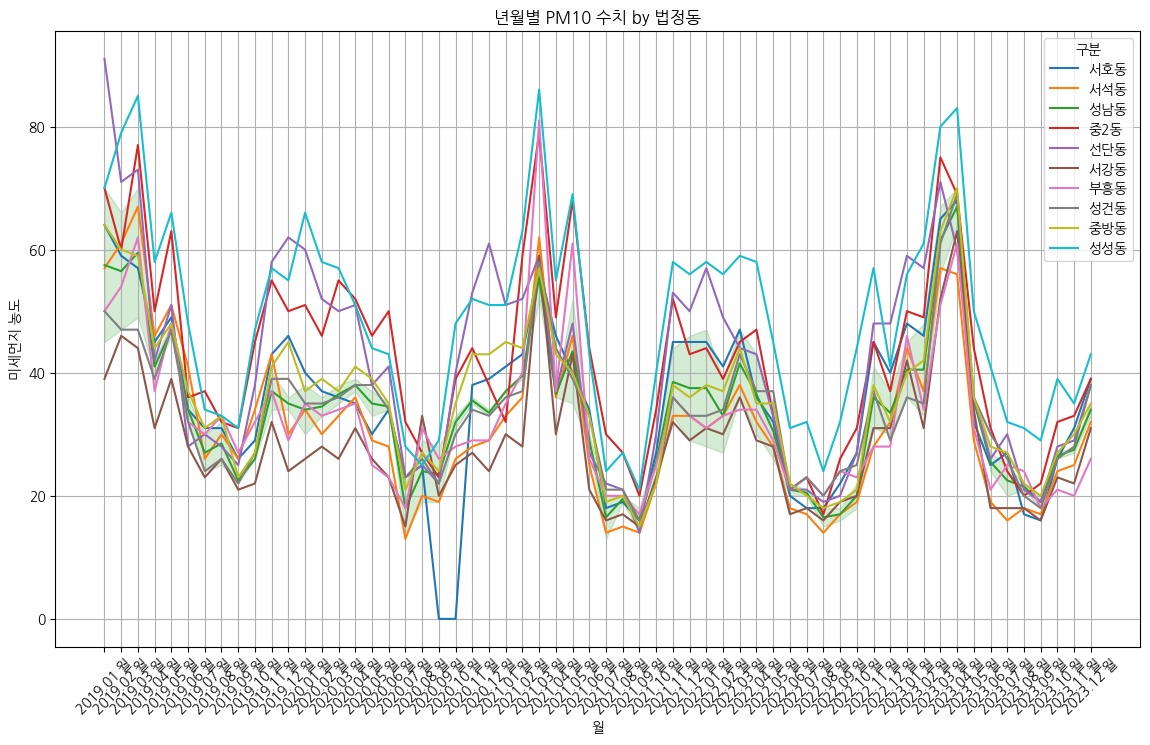

In [ ]:
# 전체 기간 동안의 변화 추이를 보기 위해 월별 데이터를 라인 차트로 표현
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='월', y='미세먼지 농도', hue='구분')
plt.title('년월별 PM10 수치 by 법정동')
plt.xticks(rotation=45)
plt.grid(True)

# 복잡하지만 이로 확실한건
# 미세먼지 농도가 우상향이 아니라 증감폭이 굉장히 다양함
# 하지만 특별히 농도가 짙은 경우가 분명히 존재
# 우선 건강 데이터로 넘어가서 두 개의 연결점에 맞는 데이터 구성

In [ ]:
# %pip install openpyxl
df_건강데이터 = pd.read_excel("./drive/MyDrive/05. 데이터 분석/asthma-2021.xlsx")
df_건강데이터

,지표년도,성별,연령,거주지역,소득수준,구분,조사건수,분율,표준오차(분율),표준화율,표준오차(표준화율)
0,1998,전체,-,-,-,전체,27745,1.1,0.1,1.2,0.1
1,1998,전체,19-29세,-,-,연령대,6138,0.4,0.1,-,-
2,1998,전체,19-64세,-,-,연령대,24416,0.8,0.1,-,-
3,1998,전체,30-39세,-,-,연령대,6808,0.4,0.1,-,-
4,1998,전체,40-49세,-,-,연령대,5549,0.6,0.1,-,-
...,...,...,...,...,...,...,...,...,...,...,...
859,2021,남성,-,읍면,-,성별/거주 지역,526,3.4,0.9,2.6,0.8
860,2021,여성,-,동,-,성별/거주 지역,2334,4.0,0.5,3.6,0.5
861,2021,여성,-,읍면,-,성별/거주 지역,657,3.1,0.9,2.4,1
862,2021,남성,-,-,-,성별,2353,2.5,0.4,2.6,0.4


In [ ]:
# 원본 데이터 구성을, 일단 [ 지표년도 19년도 ~ 21년도, 성별을 남성 & 여성, 연령, 거주지역, 조사건수, 분율 ] 만 남겨두기
df_건강데이터_filtered = df_건강데이터[(df_건강데이터['지표년도'] >= 2019) & (df_건강데이터['지표년도'] <= 2021)]
df_건강데이터_filtered

,지표년도,성별,연령,거주지역,소득수준,구분,조사건수,분율,표준오차(분율),표준화율,표준오차(표준화율)
720,2019,전체,-,-,-,전체,5935,3.2,0.3,3.2,0.4
721,2019,전체,19-29세,-,-,연령대,723,4.6,0.9,-,-
722,2019,전체,19-64세,-,-,연령대,4400,2.8,0.3,-,-
723,2019,전체,30-39세,-,-,연령대,882,2.9,0.7,-,-
724,2019,전체,40-49세,-,-,연령대,1078,2.6,0.7,-,-
...,...,...,...,...,...,...,...,...,...,...,...
859,2021,남성,-,읍면,-,성별/거주 지역,526,3.4,0.9,2.6,0.8
860,2021,여성,-,동,-,성별/거주 지역,2334,4.0,0.5,3.6,0.5
861,2021,여성,-,읍면,-,성별/거주 지역,657,3.1,0.9,2.4,1
862,2021,남성,-,-,-,성별,2353,2.5,0.4,2.6,0.4


In [ ]:
df_건강데이터_filtered = df_건강데이터_filtered[['지표년도', '성별', '연령', '거주지역', '조사건수', '분율']]
df_건강데이터_filtered

,지표년도,성별,연령,거주지역,조사건수,분율
720,2019,전체,-,-,5935,3.2
721,2019,전체,19-29세,-,723,4.6
722,2019,전체,19-64세,-,4400,2.8
723,2019,전체,30-39세,-,882,2.9
724,2019,전체,40-49세,-,1078,2.6
...,...,...,...,...,...,...
859,2021,남성,-,읍면,526,3.4
860,2021,여성,-,동,2334,4.0
861,2021,여성,-,읍면,657,3.1
862,2021,남성,-,-,2353,2.5


In [ ]:
# 값들이 뭐 뭐 있는지 체크
df_건강데이터_filtered["거주지역"].value_counts()

# 홀리~ 세부 동에 대한 정보가 없음,,
# 위 미세먼지 데이터는 동 (지역) 이 의미가 있었는데
# 데이터셋으로 인해 분석 전략을 조금 변경

,count
거주지역,
-,756
동,54
읍면,54


### 변경된 데이터 분석 접근 계획

1. 미세먼지를 "동" 으로 끝나는 것의 "연평균" 농도 값 데이터 프레임 구성
  - 결측치가 꽤 있는 데이터이기 때문에 일단 결측치가 전혀 없는 동 데이터만 구성
  - 여기서 충분히 bias 가 발생할 수 있음을 주의
2. 건강데이터에서 "동" 단위의 조사건수 및 분율, 남성, 여성 값 으로 데이터 프레임 구성
3. 위 2개의 데이터 프레임으로 서로 상관 관계 (피어슨 상관 계수) 체크
4. 시각화

In [ ]:
# 결측치가 없는 구분(장소)을 선택합니다.
locations_with_no_missing = missing_data_sorted[missing_data_sorted == 0].index.tolist()
df_미세먼지_분석 = df_미세먼지_filtered[df_미세먼지_filtered["구분"].isin(locations_with_no_missing)]
df_미세먼지_분석

,구분,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,...,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월
26,대연동,43.0,42.0,45.0,36.0,47.0,31.0,27.0,31.0,24.0,...,58.0,65.0,33.0,25.0,21.0,20.0,18.0,24.0,25.0,30.0
28,학장동,62.0,56.0,61.0,45.0,52.0,34.0,30.0,32.0,25.0,...,60.0,68.0,37.0,26.0,25.0,21.0,20.0,30.0,36.0,41.0
29,덕포동,52.0,48.0,51.0,41.0,51.0,33.0,25.0,28.0,23.0,...,56.0,59.0,33.0,26.0,21.0,18.0,19.0,28.0,30.0,36.0
30,덕천동,53.0,51.0,54.0,48.0,36.0,29.0,28.0,30.0,24.0,...,58.0,63.0,33.0,25.0,21.0,18.0,17.0,25.0,28.0,34.0
32,장림동,62.0,55.0,54.0,42.0,55.0,36.0,30.0,33.0,28.0,...,56.0,63.0,34.0,25.0,22.0,21.0,19.0,31.0,32.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,평리동,53.0,54.0,56.0,41.0,50.0,36.0,30.0,31.0,27.0,...,65.0,67.0,36.0,25.0,24.0,18.0,22.0,33.0,38.0,45.0
636,운암동,54.0,72.0,72.0,50.0,57.0,42.0,28.0,29.0,28.0,...,80.0,71.0,37.0,29.0,19.0,22.0,23.0,36.0,28.0,25.0
639,월평동,50.0,62.0,67.0,39.0,48.0,36.0,28.0,25.0,22.0,...,68.0,72.0,38.0,27.0,22.0,22.0,20.0,28.0,29.0,39.0
658,복대동,74.0,91.0,79.0,50.0,55.0,42.0,30.0,28.0,25.0,...,78.0,76.0,43.0,37.0,29.0,30.0,28.0,39.0,40.0,52.0


In [ ]:
# 2019년, 2020년, 2021년 데이터 컬럼 선택 후 연평균 계산
df_미세먼지_분석['2019 연평균'] = df_미세먼지_분석.loc[:, '2019.01 월':'2019.12 월'].mean(axis=1)
df_미세먼지_분석['2020 연평균'] = df_미세먼지_분석.loc[:, '2020.01 월':'2020.12 월'].mean(axis=1)
df_미세먼지_분석['2021 연평균'] = df_미세먼지_분석.loc[:, '2021.01 월':'2021.12 월'].mean(axis=1)

# 필요한 컬럼만 남깁니다!
df_미세먼지_분석 = df_미세먼지_분석[['구분', '2019 연평균', '2020 연평균', '2021 연평균']]
df_미세먼지_분석


<ipython-input-184-c5c5412db362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_미세먼지_분석['2019 연평균'] = df_미세먼지_분석.loc[:, '2019.01 월':'2019.12 월'].mean(axis=1)
<ipython-input-184-c5c5412db362>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_미세먼지_분석['2020 연평균'] = df_미세먼지_분석.loc[:, '2020.01 월':'2020.12 월'].mean(axis=1)
<ipython-input-184-c5c5412db362>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,구분,2019 연평균,2020 연평균,2021 연평균
26,대연동,34.666667,30.583333,31.416667
28,학장동,43.166667,36.916667,38.916667
29,덕포동,37.833333,32.5,33.083333
30,덕천동,38.166667,32.916667,34.0
32,장림동,43.5,36.166667,36.416667
...,...,...,...,...
623,평리동,42.583333,32.833333,39.083333
636,운암동,47.083333,36.75,40.166667
639,월평동,40.916667,35.75,37.25
658,복대동,50.75,39.083333,42.25


In [ ]:
# 모두 동이니까,,
# 연도별 미세먼지 평균을 long format으로 변환
df_미세먼지_last = pd.melt(df_미세먼지_분석, id_vars=['구분'], var_name='연도', value_name='평균 미세먼지 농도')
df_미세먼지_last['연도'] = df_미세먼지_last['연도'].str[:4].astype(int)  # 연도 추출
df_미세먼지_last

,구분,연도,평균 미세먼지 농도
0,대연동,2019,34.666667
1,학장동,2019,43.166667
2,덕포동,2019,37.833333
3,덕천동,2019,38.166667
4,장림동,2019,43.5
...,...,...,...
436,평리동,2021,39.083333
437,운암동,2021,40.166667
438,월평동,2021,37.25
439,복대동,2021,42.25


In [ ]:
# 동 무시, 연도별 평균 미세먼지 농도 계산
df_미세먼지_last = df_미세먼지_last.groupby("연도")["평균 미세먼지 농도"].mean().reset_index()
df_미세먼지_last

,연도,평균 미세먼지 농도
0,2019,41.933107
1,2020,33.836735
2,2021,36.767574


In [ ]:
# 건강 데이터에서 동 단위 조사 건수, 분율, 남성, 여성 값으로 구성 변경
df_건강데이터_분석 = df_건강데이터_filtered[df_건강데이터_filtered["거주지역"] == "동"]
df_건강데이터_분석

,지표년도,성별,연령,거주지역,조사건수,분율
760,2019,전체,-,동,4764,3.1
762,2019,남성,-,동,2091,2.8
764,2019,여성,-,동,2673,3.5
808,2020,전체,-,동,4337,3.1
810,2020,남성,-,동,1930,3.2
812,2020,여성,-,동,2407,3.1
856,2021,전체,-,동,4161,3.2
858,2021,남성,-,동,1827,2.4
860,2021,여성,-,동,2334,4.0


In [ ]:
df_건강데이터_last = df_건강데이터_분석[(df_건강데이터_분석["성별"] == "남성") | (df_건강데이터_분석["성별"] == "여성")]
df_건강데이터_last

,지표년도,성별,연령,거주지역,조사건수,분율
762,2019,남성,-,동,2091,2.8
764,2019,여성,-,동,2673,3.5
810,2020,남성,-,동,1930,3.2
812,2020,여성,-,동,2407,3.1
858,2021,남성,-,동,1827,2.4
860,2021,여성,-,동,2334,4.0


In [ ]:
# 연도별 평균 미세먼지 농도 데이터와 추가 데이터를 연도 기준으로 결합
merged_df = pd.merge(df_미세먼지_last, df_건강데이터_last, left_on='연도', right_on='지표년도')
merged_df

,연도,평균 미세먼지 농도,지표년도,성별,연령,거주지역,조사건수,분율
0,2019,41.933107,2019,남성,-,동,2091,2.8
1,2019,41.933107,2019,여성,-,동,2673,3.5
2,2020,33.836735,2020,남성,-,동,1930,3.2
3,2020,33.836735,2020,여성,-,동,2407,3.1
4,2021,36.767574,2021,남성,-,동,1827,2.4
5,2021,36.767574,2021,여성,-,동,2334,4.0


Text(0.5, 1.0, '연도별 성별 조사건수')

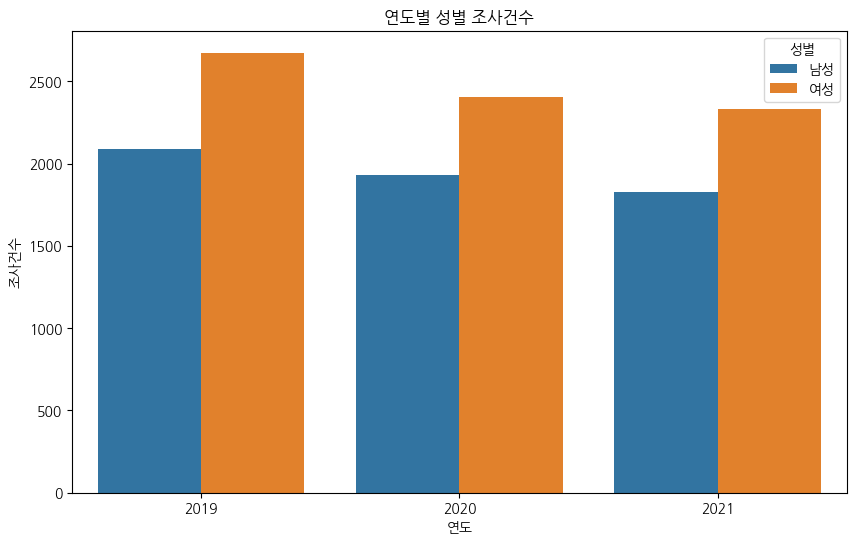

In [ ]:
# 1. 연도별 평균 미세먼지 농도와 성별에 따른 조사건수
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x="연도", y="조사건수", hue="성별")
plt.title("연도별 성별 조사건수")

Text(0.5, 1.0, '연도별 성별 분율 변화')

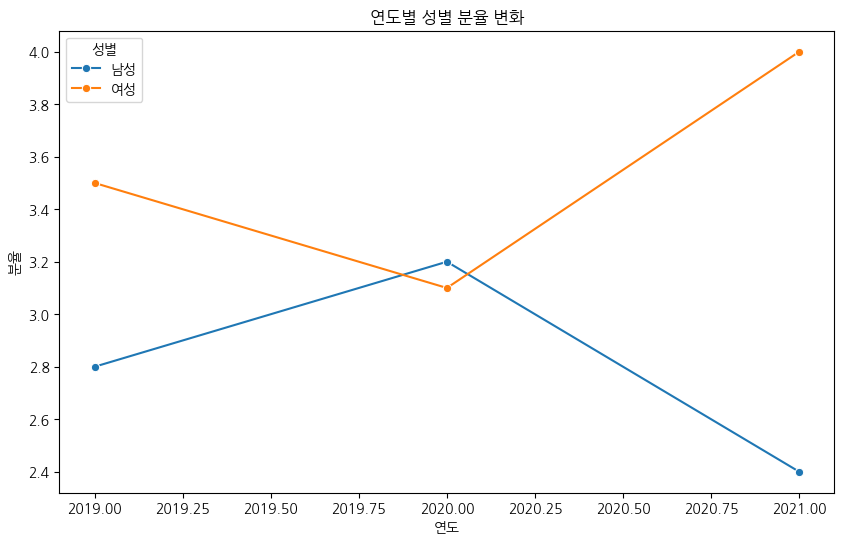

In [ ]:
# 2. 연도별 평균 미세먼지 농도에 따른 분율
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x="연도", y="분율", hue="성별", marker="o")
plt.title("연도별 성별 분율 변화")

Text(0.5, 1.0, '평균 미세먼지 농도와 조사건수의 관계')

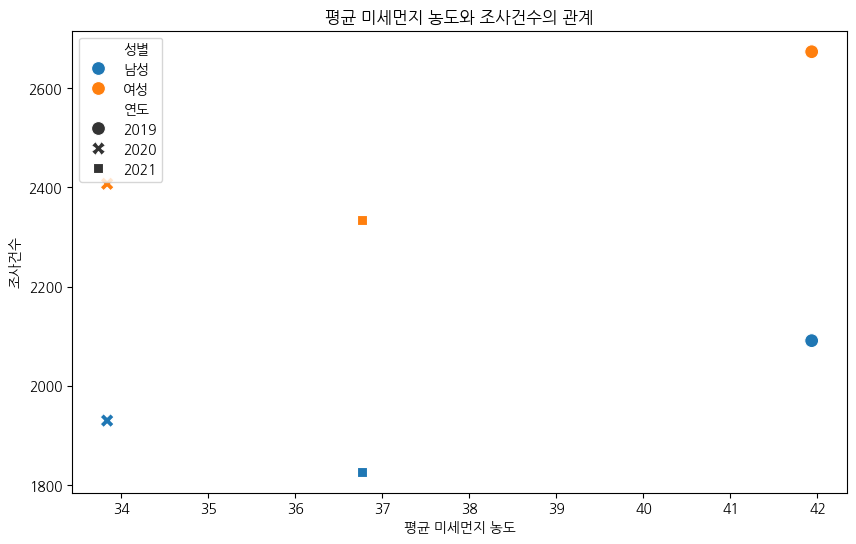

In [ ]:
# 3. 평균 미세먼지 농도와 조사건수의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="평균 미세먼지 농도", y="조사건수", hue="성별", style="연도", s=100)
plt.title("평균 미세먼지 농도와 조사건수의 관계")

In [ ]:
# 상관관계 계산
correlation_matrix = merged_df[["평균 미세먼지 농도", "조사건수", "분율"]].corr()
correlation_matrix

,평균 미세먼지 농도,조사건수,분율
평균 미세먼지 농도,1.000000,0.345534,-0.007337
조사건수,0.345534,1.000000,0.648760
분율,-0.007337,0.648760,1.000000


<Axes: >

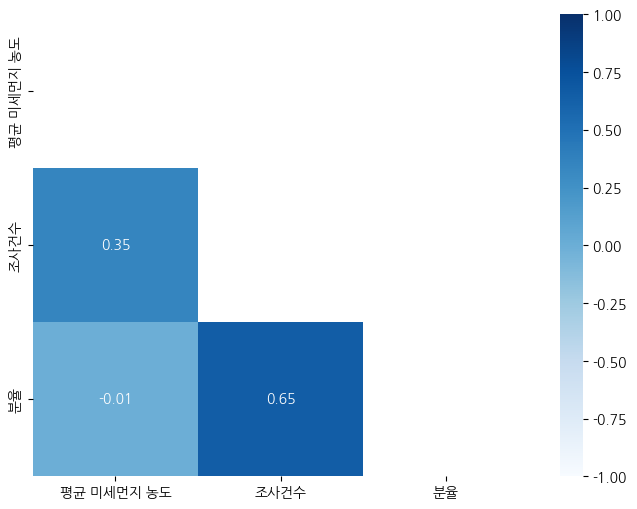

In [ ]:
# 상관 관계 시각화
# 왼쪽 아래만 (대각선 기준) 나오게 masking
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", mask=mask, vmax=1.0, vmin=-1.0)


### 데이터 분석 결론

> 데이터 셋의 한계와 전후 처리 과정 중 많은 bias 가 들어가서 조금 아쉬운 결론

1. 19년도 20년도는 미세먼지 농도 감소, 21년도 소폭 증가, 대기질은 무조건 우상향 상태는 아닌 것을 알 수 있음
2. 폐질환 조사건수는 남성, 여성 모두 19년 21년까지 감소함 (아마 코로나 영향이 다분하게 있는 것으로 판단됨!) 특히 남성은 감소폭이 컷음
3. 여성의 조사건수와 분율이 남성보다 높았음!
4. 상관관계 분석 결과, ***평균 미세먼지 농도와 조사건수 간에는 약한 양의 상관관계가 존재할 수 있음***
  - 이는 미세먼지 농도가 높을수록 조사건수(즉, 건강 문제로 인해 보고되는 경우)가 증가할 가능성이 있음
  - 하지만 지역별 특성을 고려하지 않고, 성별에 대한 특수성에 대한 고려가 없기 때문에 많은 bias 가 들어간 값임